# Exploratory Data Analysis

## Context:

A project for GreatLearning course on Data Science and Business Analytics. Some content is derived from class discussion.


## Objective:

1. Perform uni-variate and multi-variate analyses.
2. Generate a set of insights and recommendations that will help the company in targeting new customers.
3. Come up with a customer profile (characteristics of a customer) of the different products.

## Data ##

The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness.

**`Data Dictionary:`**

**CardioGoodFitness.csv** - contains information about customers of treadmill products from a survey conducted Jan - March 2021.

`Product` - the model no. of the treadmill

`Age` - in no of years, of the customer

`Gender` - of the customer

`Education` - in no. of years, of the customer

`Marital Status` - of the customer

`Usage` - Avg. # times the customer wants to use the treadmill every week

`Fitness` - Self-rated fitness score of the customer (5 - very fit > 1 - very unfit)

`Income` - of the customer

`Miles`- expected to run

**Import Modules:**

In [1]:
# Install & import modules and set coding rules
# https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.

# Install needed libraries
!pip3 install pandas_profiling

# Import exporting utilities
import dataframe_image as dfi
!pip install dataframe-image # for printing out tables
!pip install nbconvert # for printing to non-ipynb formats
!pip install nbconvert[webpdf]

# Warning packages
import warnings
warnings.filterwarnings('ignore')

# Data analsys packages
import pandas as pd
import pandas_profiling
import numpy as np
from scipy import stats
from scipy.stats import mode

# Data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


**Import Data**

In [2]:
# Importing the dataset into Python & understanding the structure of the dataset
df = pd.read_csv("CardioGoodFitness.csv")

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

# Set the juypter notebook viewer to show all rows when printing a series
pd.set_option('display.max_colwidth', 5000) 
pd.set_option('display.max_rows', 5000)


In [3]:
# Create a copy of the dataframe
df = df.copy()

### Understanding the structure of the data ###

In [4]:
# View top 5 rows of dataframe
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

In [5]:
# View bottom 5 rows of dataframe
df.tail()

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
175   TM798   40   Male         21        Single      6        5   83416   
176   TM798   42   Male         18        Single      5        4   89641   
177   TM798   45   Male         16        Single      5        5   90886   
178   TM798   47   Male         18     Partnered      4        5  104581   
179   TM798   48   Male         18     Partnered      4        5   95508   

     Miles  
175    200  
176    200  
177    160  
178    120  
179    180

In [6]:
# View shape of the dataframe
df.shape

(180, 9)

In [7]:
# Find object types
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
# Check memory size
df.memory_usage().sum()/1000

13.088

In [9]:
# Adjust dtypes to work with all categories.
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category')) # convert dtypes to standard int64 or category
# df["Fitness"] = df["Fitness"].astype("Category")

In [10]:
# Explore dataframe information and check dtype change.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


**memory usage has decreased after object dtype change **

In [11]:
# View column names in the dataframe
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Basic summary of data and graphical exploration ###

In [12]:
# Create pandas profile and print for viewing EDA
pandas_profiling.ProfileReport(df)

In [13]:
# 5 (Quantile) Statistics for numerical variables
df_styled = df.describe()
display(df_styled)
#dfi.export(df_styled, 'df_styled.png')

Age  Education  Usage  Fitness    Income  Miles
count 180.00     180.00 180.00   180.00    180.00 180.00
mean   28.79      15.57   3.46     3.31  53719.58 103.19
std     6.94       1.62   1.08     0.96  16506.68  51.86
min    18.00      12.00   2.00     1.00  29562.00  21.00
25%    24.00      14.00   3.00     3.00  44058.75  66.00
50%    26.00      16.00   3.00     3.00  50596.50  94.00
75%    33.00      16.00   4.00     4.00  58668.00 114.75
max    50.00      21.00   7.00     5.00 104581.00 360.00

* The yearly income for an 18year old points to around $15/hr wage.
* The miles are not limited to a time-marker - is it weekly or monthly?
* The cap on age is 50, which means a large demographic is missing.

In [14]:
# Basic statistics for Categorical variables
df.describe(include=["category"])

Product Gender MaritalStatus
count      180    180           180
unique       3      2             2
top      TM195   Male     Partnered
freq        80    104           107

* More married people buy treadmills.
* The TM195 product is sold more than the 2 other products combined.
* Strongly outweighting Females are Male customers.

In [15]:
# Find missing values
df.isnull().value_counts()

Product  Age    Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
False    False  False   False      False          False  False    False   False    180
dtype: int64

In [16]:
# Subset the dataframe based on numeric and categorical types
numerical_features=df.select_dtypes(include=["int64","float64"])
global numerical_features
#type(numerical_features)

In [17]:
categoricals=df.select_dtypes(include=["object", "category", "string"])
global categoricals
#type(categoricals)

In [18]:
# Function to perform statistical analysis on every numeric and categorical variable in the dataframe
pd.set_option('display.max_colwidth', 5000)
def univar_num(dataframe): # argument is the whole dataframe

    # Print statistics for numeric variables
    print('Value counts of numeric features \n', numerical_features.value_counts()) # value counts of each feature
    print('\n Median Analysis \n',numerical_features.median()) # Medians of each feature
    print('\n Mode Analysis \n',numerical_features.mode()) # Mode (or most popular)
    print('\n Sum Analysis \n',numerical_features.sum()) # Sum analysis
    print('\n Variance analysis \n',numerical_features.var()) # Variance analysis
    print('\n Standard Deviation analysis \n',numerical_features.std()) #Standard Deviation analysis
    print('\n Absolute Deviation or Mean Absolute Deviation \n',numerical_features.mad()) # Absolute Deviation or Mean Absolute Deviation
    print('\n  Skew analysis \n ',numerical_features.skew()) # Skew analysis
    
    # Print statistics for categorical variables (df.describe(include=["category"]))
    print('\n Frequency for categorical features \n', [categoricals.apply(lambda x: x.value_counts())]) # Value counts of each feature
    print('\n Unique categorical counts for categorical features \n', [categoricals.apply(lambda x: x.value_counts().count())]) # Unique counts
    print('\n Top category for categorical features \n', [categoricals.apply(lambda x: x.mode())]) # Mode of each category
    
    #raise Exception("End to kill infinite loop") 
    
    return

In [19]:
# Run dataframe through function
pd.set_option('display.max_colwidth', 5000)
univar_num(numerical_features)

Value counts of numeric features 
 Age  Education  Usage  Fitness  Income  Miles
50   16         3      3        64809   66       1
25   14         5      3        47754   106      1
                4      3        45480   170      1
                3      4        43206   127      1
                                        106      1
                       3        48891   75       1
                                45480   95       1
                                39795   85       1
                2      3        45480   85       1
                                        56       1
                                43206   64       1
                       2        53439   47       1
                                45480   42       1
24   18         4      5        57271   80       1
     16         5      5        52291   200      1
                                49801   160      1
                                44343   188      1
                4      5        61006   100      1
 

**Univariate Data Analysis**

Analysis of spread and distribution of every feature in the dataset.

In [20]:
# Frequency tables for every feature
for (column_name,column_data) in df.iteritems(): # for every column in the dataframe return the column name and Series of data
    display((column_name,column_data.value_counts()))

('Product',
 TM195    80
 TM498    60
 TM798    40
 Name: Product, dtype: int64)

('Age',
 25    25
 23    18
 26    12
 24    12
 28     9
 33     8
 35     8
 30     7
 38     7
 22     7
 21     7
 27     7
 34     6
 31     6
 29     6
 40     5
 20     5
 32     4
 19     4
 37     2
 45     2
 48     2
 47     2
 50     1
 36     1
 39     1
 41     1
 42     1
 43     1
 44     1
 46     1
 18     1
 Name: Age, dtype: int64)

('Gender',
 Male      104
 Female     76
 Name: Gender, dtype: int64)

('Education',
 16    85
 14    55
 18    23
 15     5
 13     5
 21     3
 12     3
 20     1
 Name: Education, dtype: int64)

('MaritalStatus',
 Partnered    107
 Single        73
 Name: MaritalStatus, dtype: int64)

('Usage',
 3    69
 4    52
 2    33
 5    17
 6     7
 7     2
 Name: Usage, dtype: int64)

('Fitness',
 3    97
 5    31
 2    26
 4    24
 1     2
 Name: Fitness, dtype: int64)

('Income',
 45480     14
 52302      9
 53439      8
 54576      8
 46617      8
 50028      7
 51165      7
 40932      6
 43206      5
 35247      5
 34110      5
 48891      5
 38658      5
 32973      5
 36384      4
 44343      4
 57987      4
 64809      3
 92131      3
 90886      3
 60261      3
 59124      3
 56850      2
 67083      2
 88396      2
 61006      2
 42069      2
 31836      2
 39795      2
 104581     2
 48556      2
 47754      2
 49801      2
 64741      2
 37521      2
 83416      2
 89641      2
 61398      2
 77191      1
 57271      1
 62251      1
 48658      1
 95508      1
 65220      1
 99601      1
 74701      1
 30699      1
 70966      1
 52290      1
 103336     1
 52291      1
 53536      1
 62535      1
 75946      1
 55713      1
 69721      1
 95866      1
 58516      1
 85906      1
 29562      1
 68220      1
 54781      1
 Name: Income, dtype: int64)

('Miles',
 85     27
 95     12
 66     10
 75     10
 47      9
 106     9
 113     8
 94      8
 53      7
 100     7
 56      6
 64      6
 180     6
 200     6
 127     5
 160     5
 42      4
 150     4
 120     3
 38      3
 170     3
 74      3
 103     3
 132     2
 141     2
 300     1
 280     1
 21      1
 240     1
 80      1
 212     1
 360     1
 112     1
 140     1
 169     1
 188     1
 260     1
 Name: Miles, dtype: int64)

**Visualizations of each feature**

In [25]:
# Function to create distribution and statistical plots for each feature in the dataframe
def univar_vis(dataframe):
    
    sns.set(style="ticks")
    sns.set_style("darkgrid")
    
    # Univariate visualization of numeric variables
    for (column_name,column_data) in numerical_features.iteritems():
        
        try:
            
            print(column_name, "Histogram") 
            sns.histplot(column_data, kde=True) #histogram
            plt.show()

            print(column_name, "Distribution Plot")
            sns.displot(data = column_data) # distribution plot
            plt.show()

            print(column_name, "Density Plot")
            sns.kdeplot(data=df, x=numerical_features[column_name]) # Kernel distribution
            plt.show()

            print(column_name, "Count Plot")
            plt.figure(figsize=(20,10))
            sns.countplot(x = column_data, ax=column_data) # Count plot
            perc(ax, df.column_data)
            plt.show()

            print(column_name, "Box Plot")
            sns.boxplot(data = df, y = column_data) # Box plot
            plt.show()
        
        except AttributeError:
            pass
            
        else:
            continue
            

Age Histogram


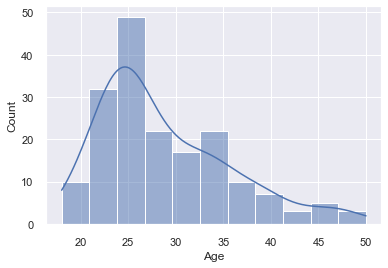

Age Distribution Plot


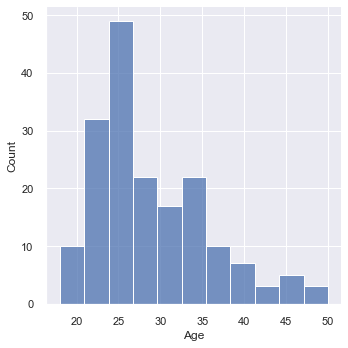

Age Density Plot


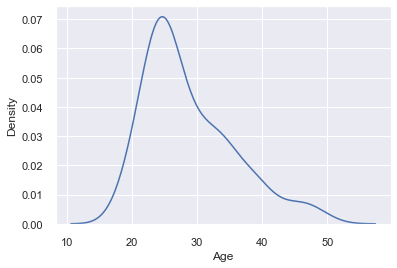

Age Count Plot
Education Histogram


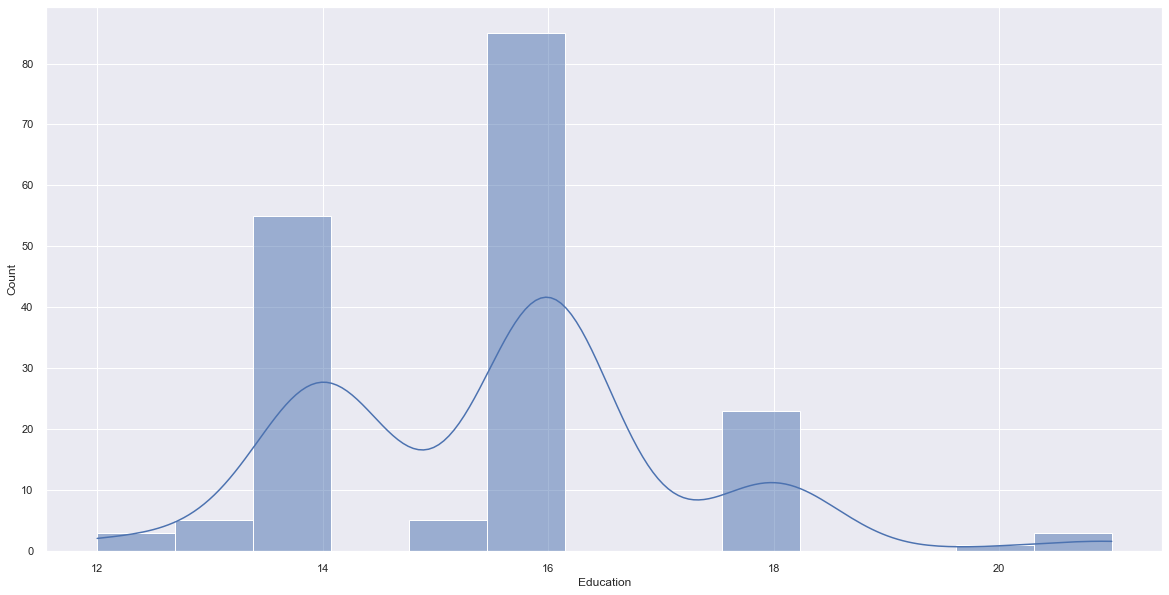

Education Distribution Plot


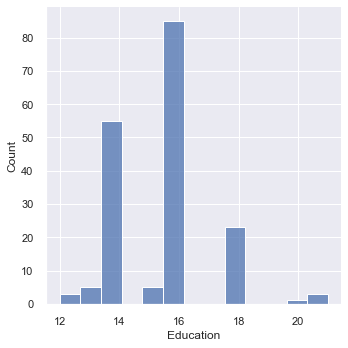

Education Density Plot


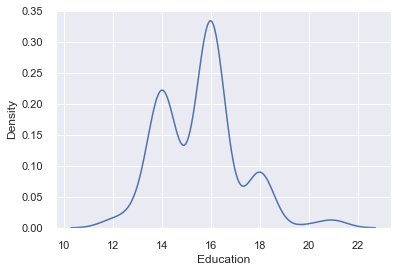

Education Count Plot
Usage Histogram


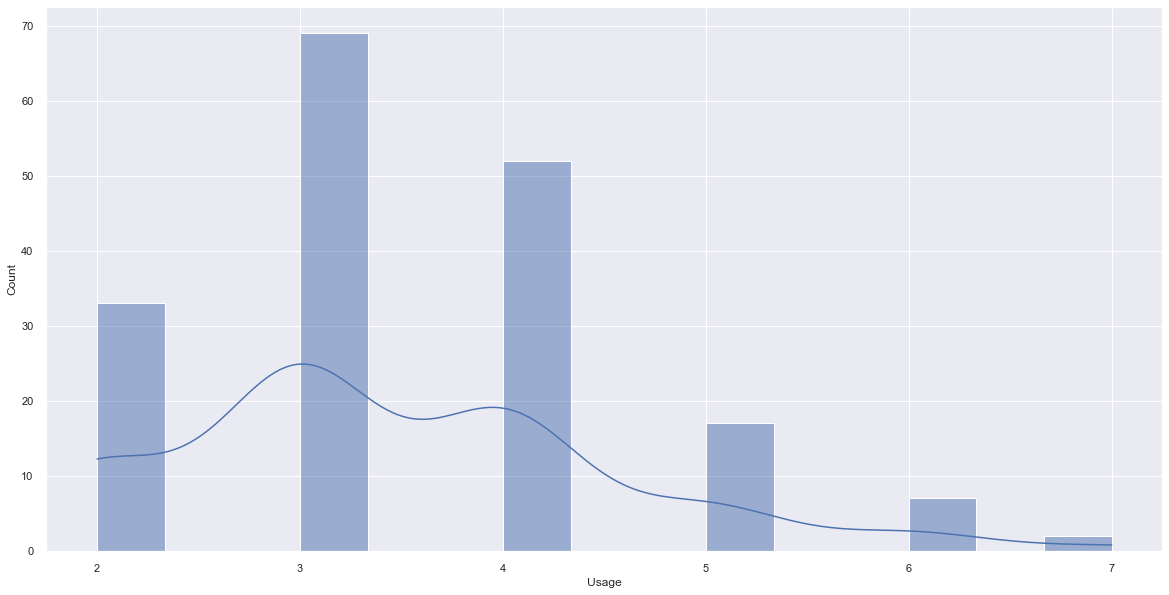

Usage Distribution Plot


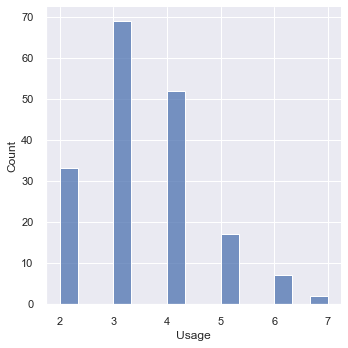

Usage Density Plot


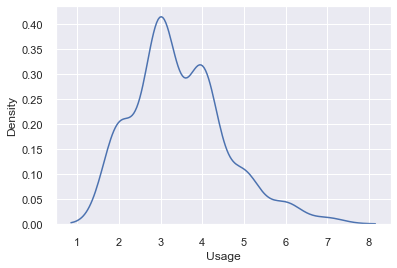

Usage Count Plot
Fitness Histogram


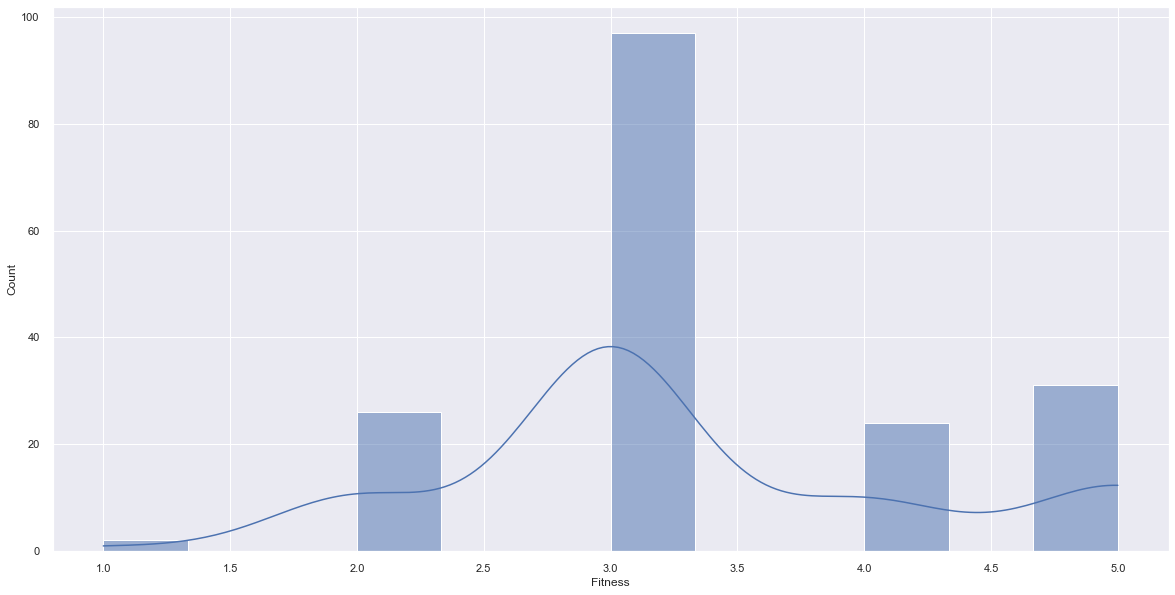

Fitness Distribution Plot


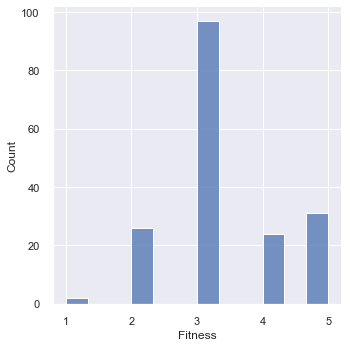

Fitness Density Plot


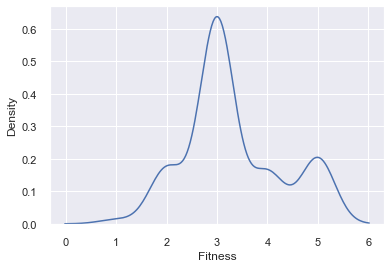

Fitness Count Plot
Income Histogram


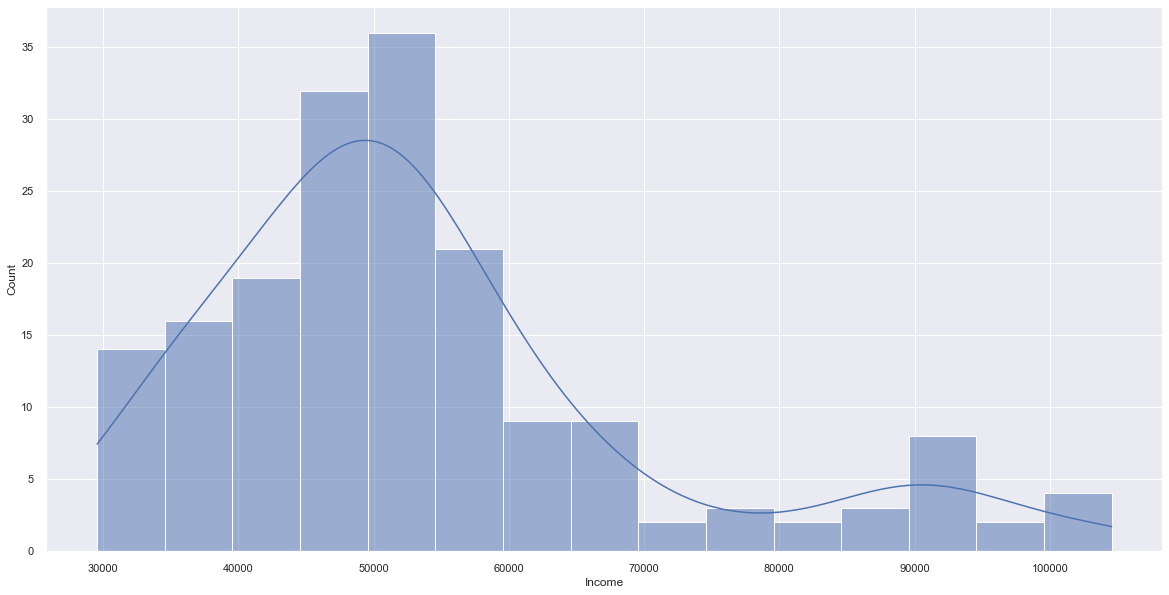

Income Distribution Plot


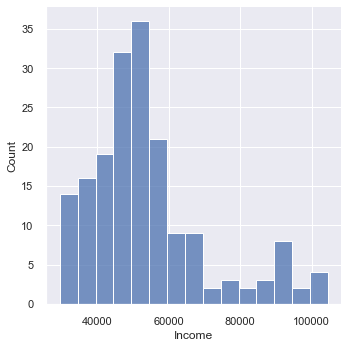

Income Density Plot


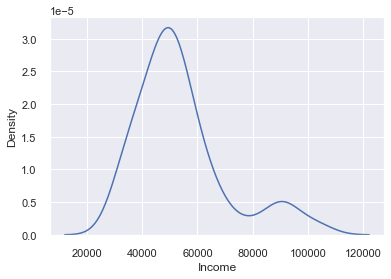

Income Count Plot
Miles Histogram


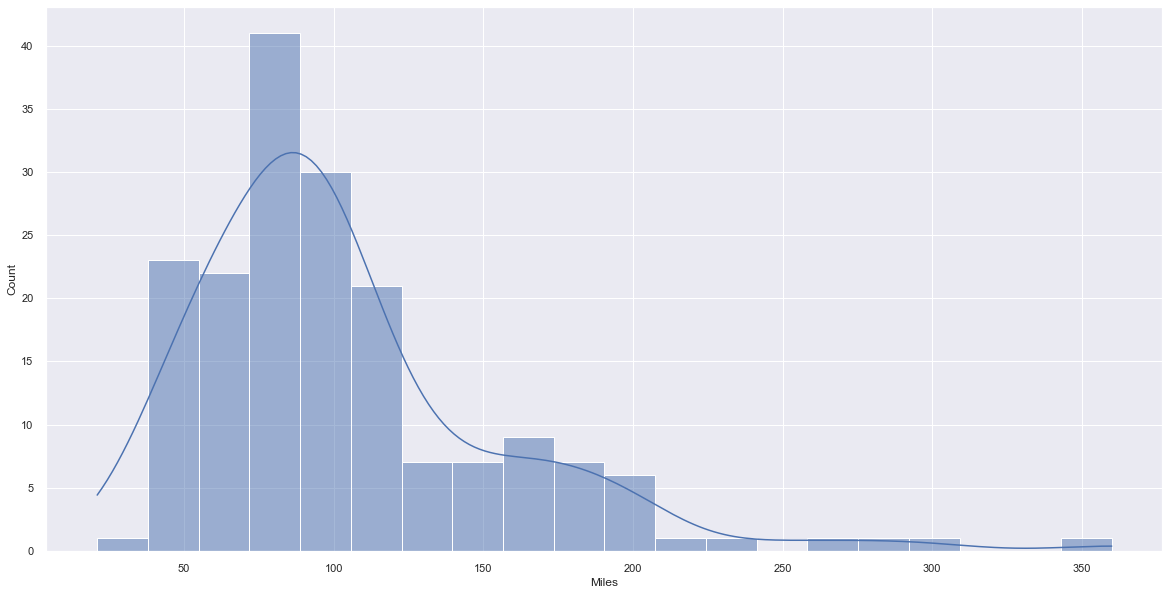

Miles Distribution Plot


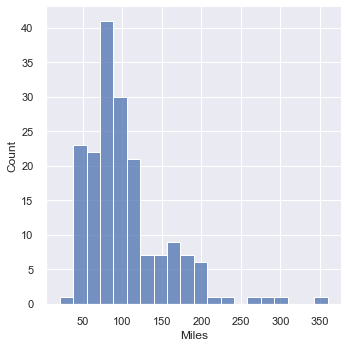

Miles Density Plot


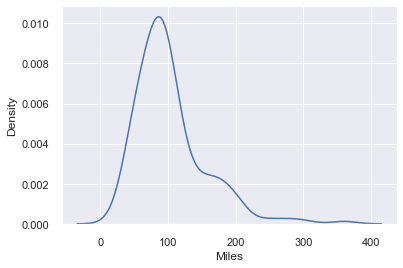

Miles Count Plot


<Figure size 1440x720 with 0 Axes>

In [26]:
# Run dataframe through function
univar_vis(df)

In [27]:
### Code from Mounika of GreatLearning as given in the Uber Case study ###

# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

Age          None
Education    None
Usage        None
Fitness      None
Income       None
Miles        None
dtype: object

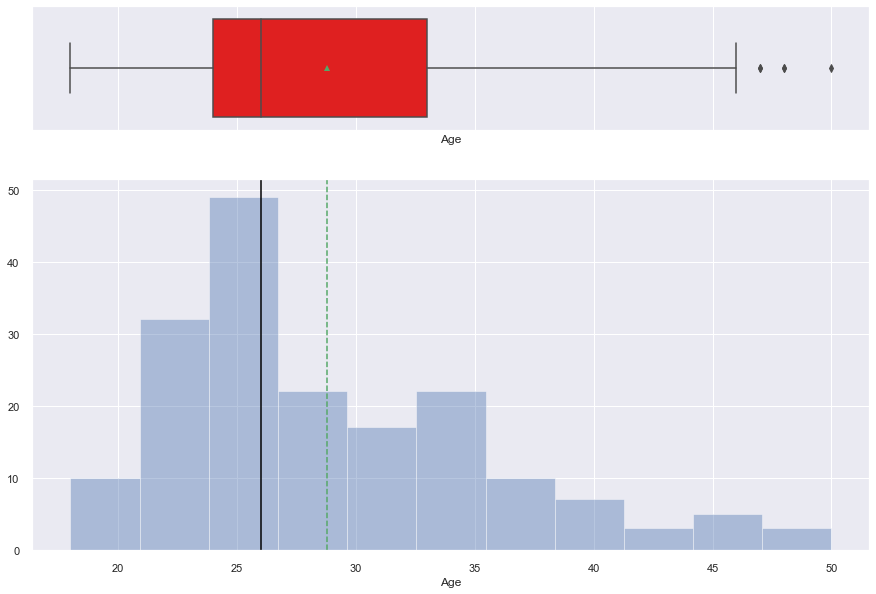

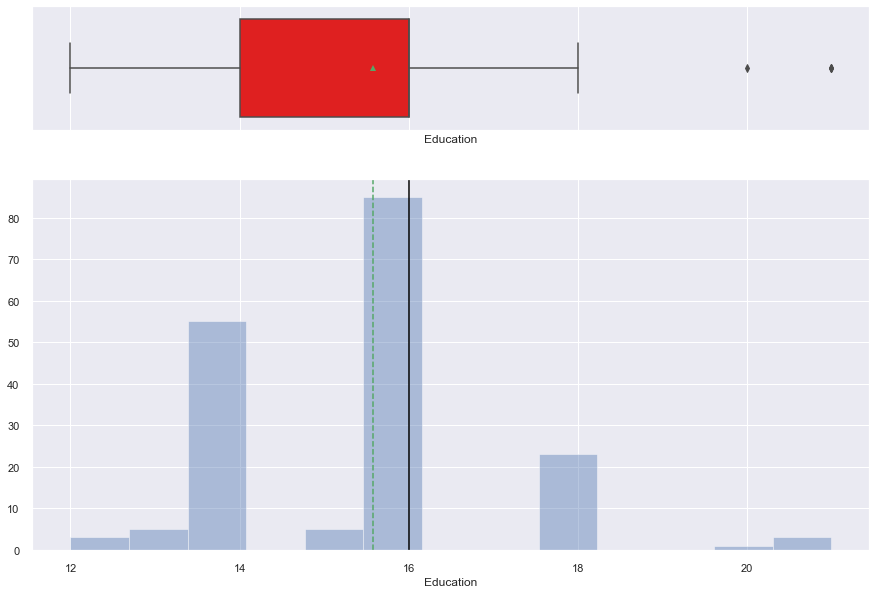

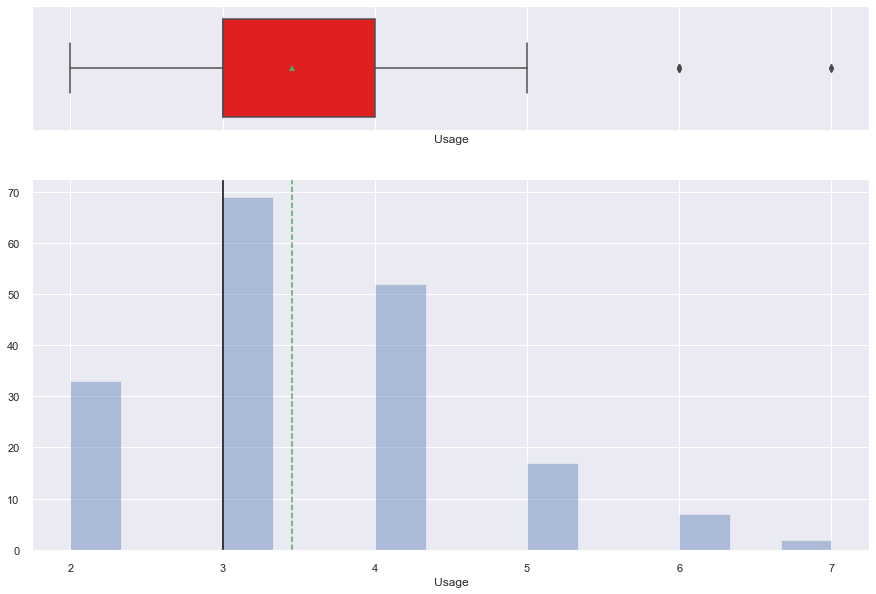

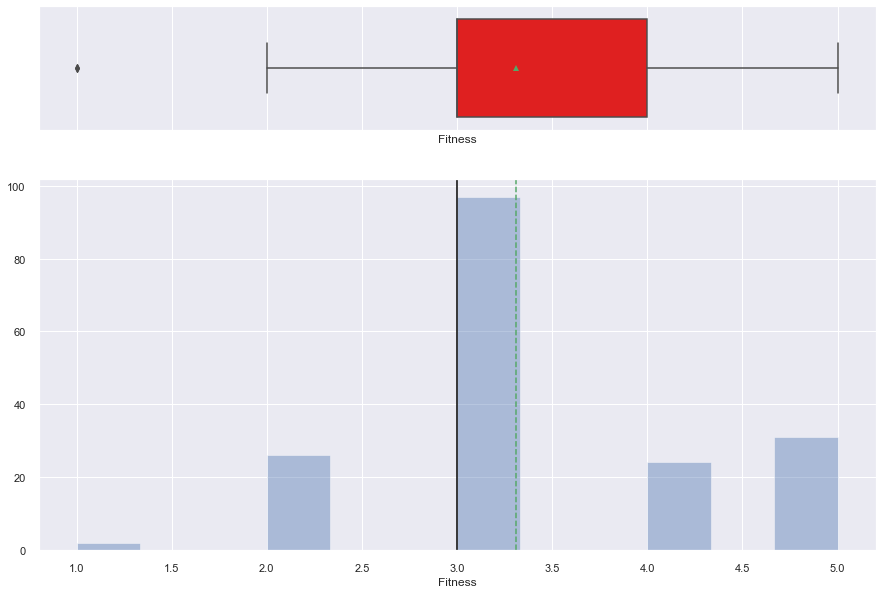

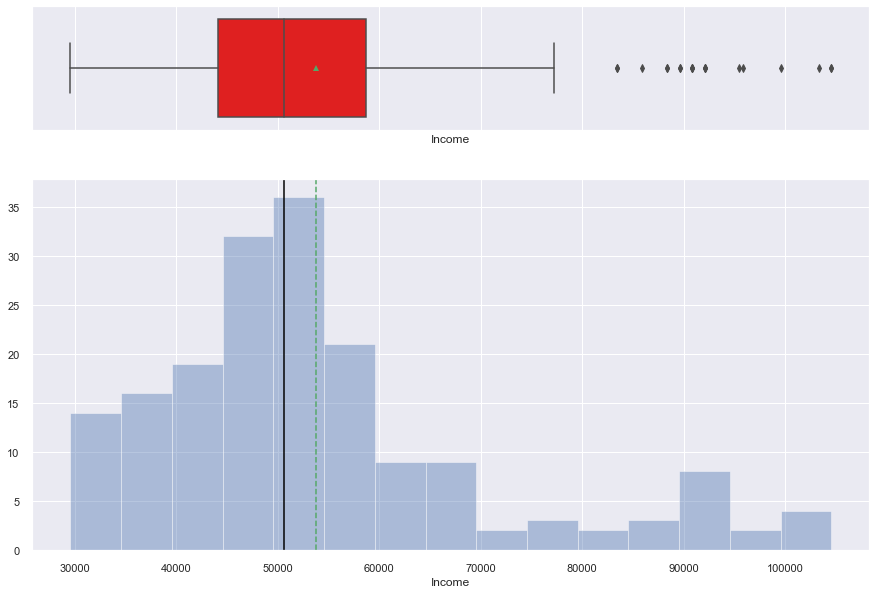

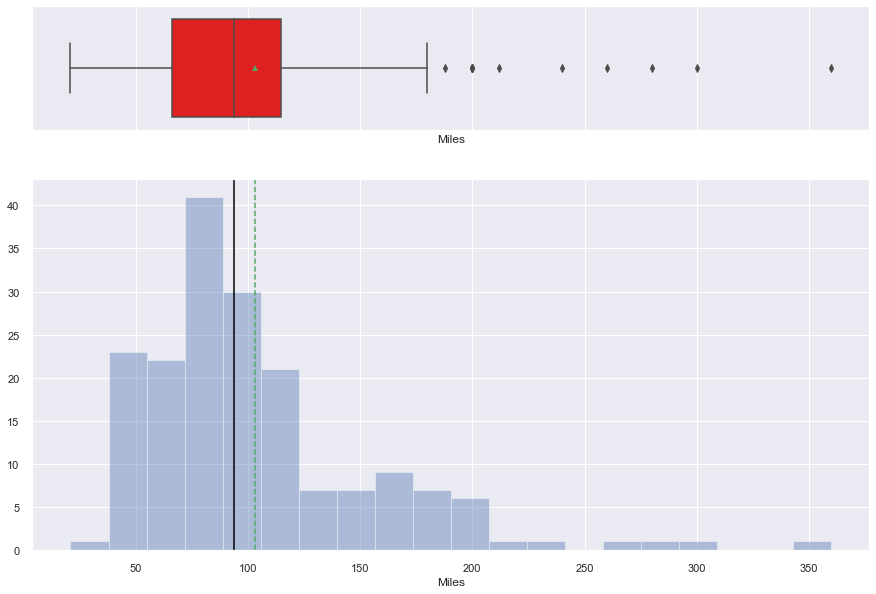

In [28]:
display(numerical_features.apply(lambda x: histogram_boxplot(x)))

**Bivariate Analysis**

In [29]:
# Univariate visualization of categorical variables
def bi_var(dataframe):
    for (column_name_c,column_data_c) in categoricals.iteritems():
        for (column_name,column_data) in numerical_features.iteritems():
        
            print(column_name_c, "Bar Plot")
            sns.barplot(x=column_data_c, y=column_data) # Bar plot against a numeric variable
            plt.show()
        
            print(column_name_c, "Box Plot")
            sns.boxplot(data = df, x = column_data_c, y=column_data, palette="rainbow") # Box plot against a numeric variable
            plt.show()
    
    return 

Product Bar Plot


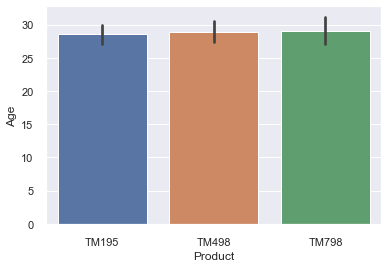

Product Box Plot


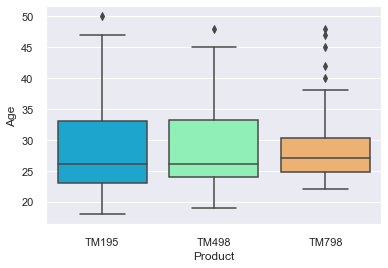

Product Bar Plot


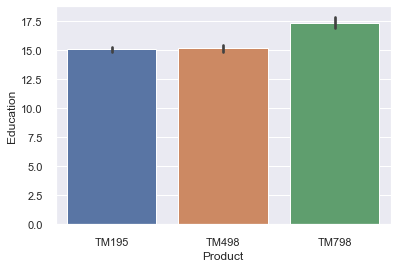

Product Box Plot


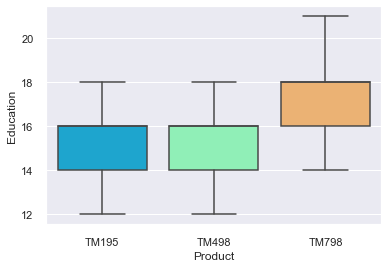

Product Bar Plot


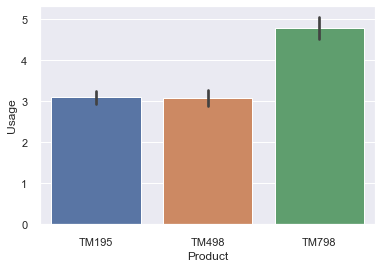

Product Box Plot


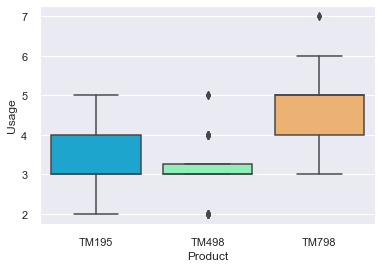

Product Bar Plot


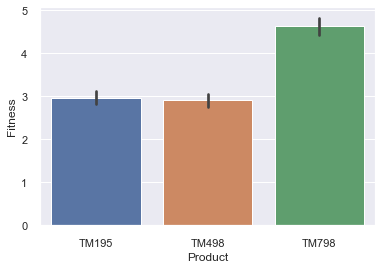

Product Box Plot


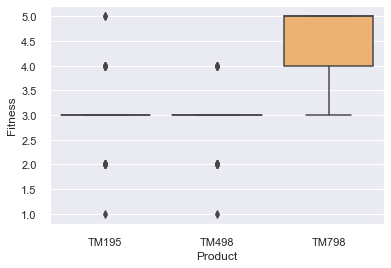

Product Bar Plot


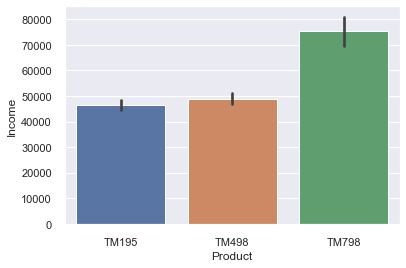

Product Box Plot


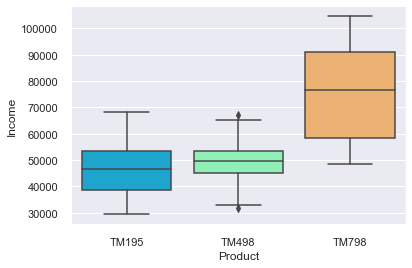

Product Bar Plot


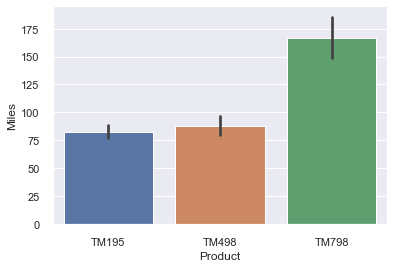

Product Box Plot


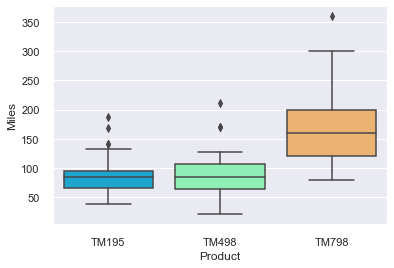

Gender Bar Plot


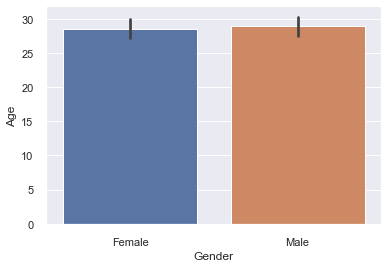

Gender Box Plot


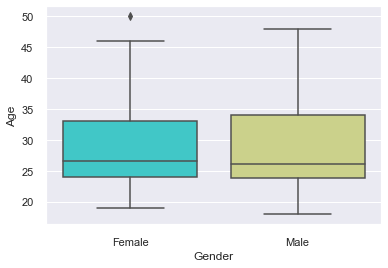

Gender Bar Plot


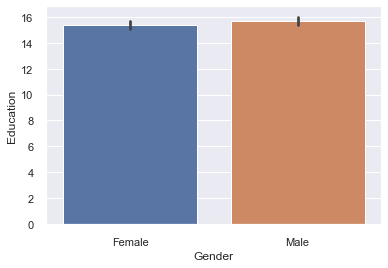

Gender Box Plot


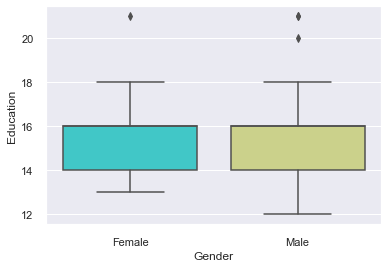

Gender Bar Plot


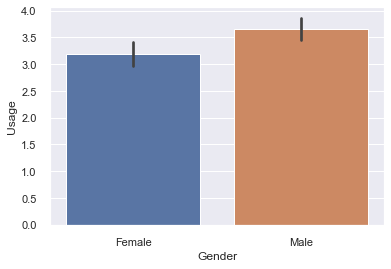

Gender Box Plot


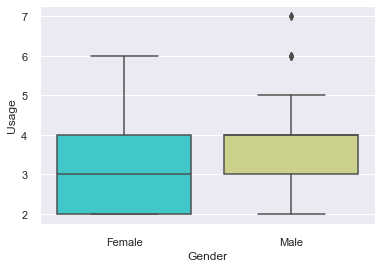

Gender Bar Plot


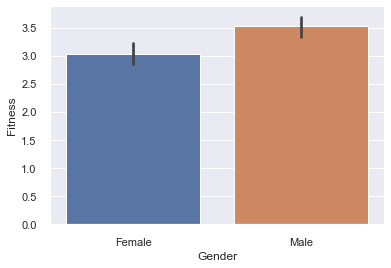

Gender Box Plot


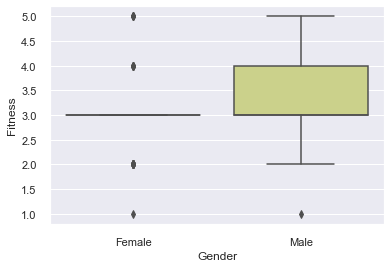

Gender Bar Plot


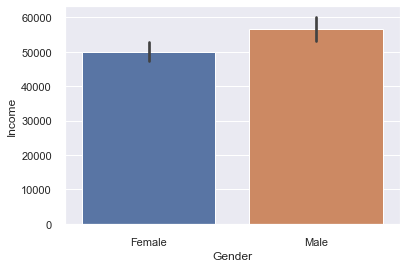

Gender Box Plot


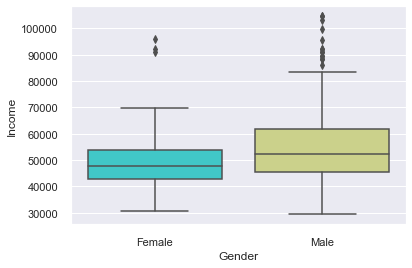

Gender Bar Plot


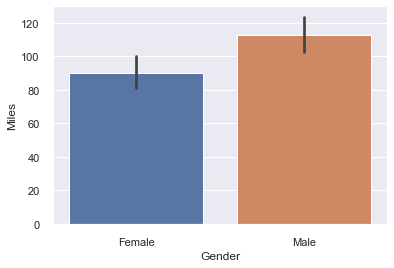

Gender Box Plot


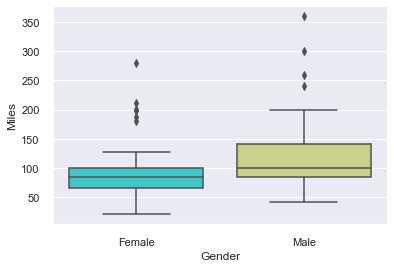

MaritalStatus Bar Plot


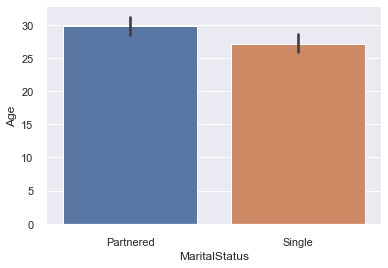

MaritalStatus Box Plot


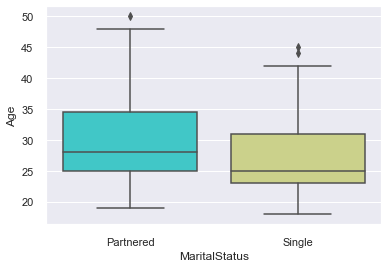

MaritalStatus Bar Plot


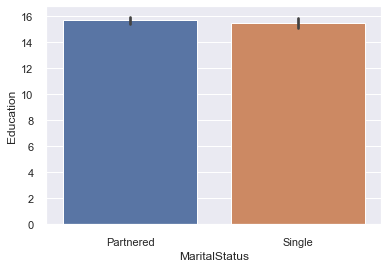

MaritalStatus Box Plot


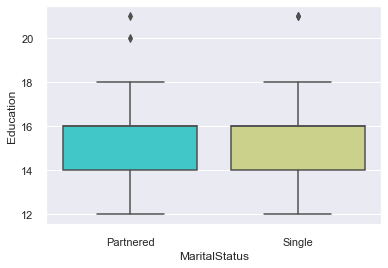

MaritalStatus Bar Plot


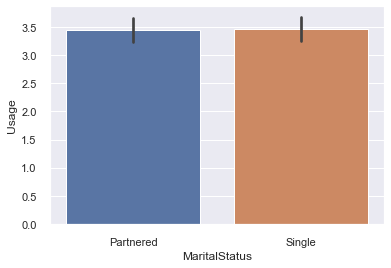

MaritalStatus Box Plot


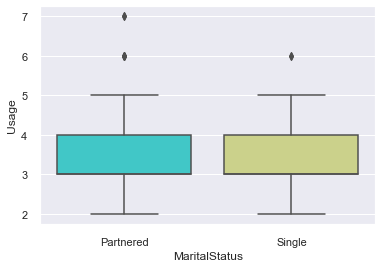

MaritalStatus Bar Plot


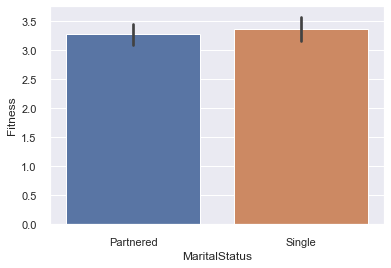

MaritalStatus Box Plot


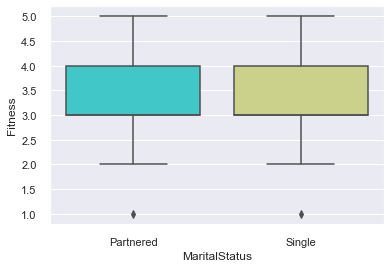

MaritalStatus Bar Plot


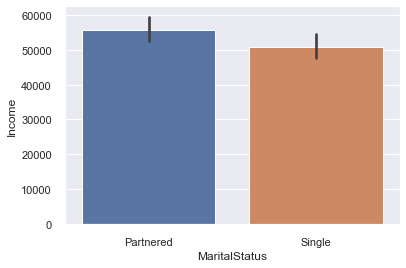

MaritalStatus Box Plot


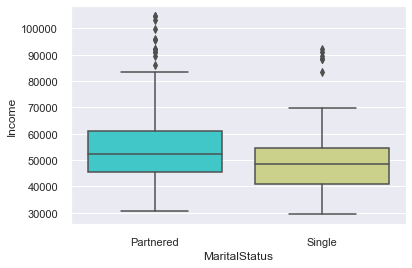

MaritalStatus Bar Plot


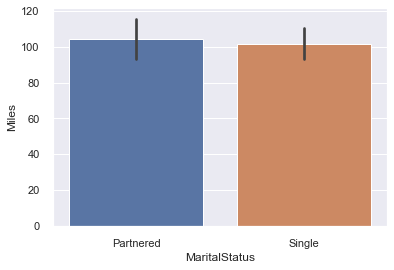

MaritalStatus Box Plot


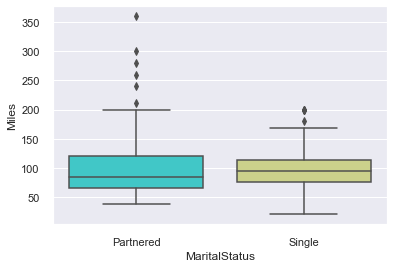

In [30]:
bi_var(df)

**Multivariate Data Analysis**

Analysis of interaction between features in the dataset.

In [101]:
df.sort_values(by=["Age","Income"],ascending=[True,True]).head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0    TM195   18    Male         14        Single      3        4   29562   
2    TM195   19  Female         14     Partnered      4        3   30699   
1    TM195   19    Male         15        Single      2        3   31836   
80   TM498   19    Male         14        Single      3        3   31836   
3    TM195   19    Male         12        Single      3        3   32973   

    Miles  
0     112  
2      66  
1      75  
80     64  
3      85

In [49]:
# Isolate single females for testing
df_test = df[(df.Gender == "Female") & (df["MaritalStatus"] == "Single")]

In [50]:
df_test.describe()

Age  Education  Usage  Fitness   Income  Miles
count 30.00      30.00  30.00    30.00    30.00  30.00
mean  28.00      15.67   3.13     2.97 48502.80  84.93
std    5.70       1.73   0.86     0.85  9251.53  33.75
min   22.00      13.00   2.00     1.00 34110.00  21.00
25%   24.00      14.00   3.00     2.25 42353.25  66.00
50%   25.50      16.00   3.00     3.00 46617.00  80.00
75%   31.75      16.00   4.00     3.00 53227.50 102.25
max   44.00      21.00   5.00     5.00 69721.00 200.00

In [31]:
# Get min and max to find the range of each feature per product
df.groupby("Product").min()

Age  Education  Usage  Fitness  Income  Miles
Product                                               
TM195     18         12      2        1   29562     38
TM498     19         12      2        1   31836     21
TM798     22         14      3        3   48556     80

In [32]:
# Split the dataframe by product and view the maximum value
df.groupby("Product").max()

Age  Education  Usage  Fitness  Income  Miles
Product                                               
TM195     50         18      5        5   68220    188
TM498     48         18      5        4   67083    212
TM798     48         21      7        5  104581    360

In [47]:
# Find top Fitness score by Product
df.groupby("Product")[["Fitness"]].max()

Fitness
Product         
TM195          5
TM498          4
TM798          5

In [33]:
# View the most frequent values per feature per Product to get best fit for customer profile for skewed distributions
# https://pbpython.com/groupby-agg.html
df.groupby("Product").mean()

Age  Education  Usage  Fitness   Income  Miles
Product                                                 
TM195   28.55      15.04   3.09     2.96 46418.03  82.79
TM498   28.90      15.12   3.07     2.90 48973.65  87.93
TM798   29.10      17.32   4.78     4.62 75441.57 166.90

In [34]:
# Identify the median per feature for each product line
df.groupby(df.Product).agg("median")

Age  Education  Usage  Fitness   Income  Miles
Product                                                 
TM195   26.00      16.00   3.00     3.00 46617.00  85.00
TM498   26.00      16.00   3.00     3.00 49459.50  85.00
TM798   27.00      18.00   5.00     5.00 76568.50 160.00

In [35]:
# View the the typical values for each feature by Product
df.groupby(df.Product).agg(mode) # [mode][mode count]

Age            Gender     Education        MaritalStatus  \
Product                                                                      
TM195     ([23], [8])  ([Female], [40])  ([16], [39])  ([Partnered], [48])   
TM498    ([25], [11])    ([Male], [31])  ([16], [31])  ([Partnered], [36])   
TM798     ([25], [7])    ([Male], [33])  ([18], [19])  ([Partnered], [23])   

               Usage      Fitness          Income         Miles  
Product                                                          
TM195    ([3], [37])  ([3], [54])  ([46617], [7])  ([85], [16])  
TM498    ([3], [31])  ([3], [39])  ([45480], [9])  ([95], [12])  
TM798    ([4], [18])  ([5], [29])  ([90886], [3])  ([100], [7])

In [100]:
# Get descriptive stats on every product by every numerical measure
for (column_name,column_data) in numerical_features.iteritems():
    print("Stats by",column_name,"\n",df.groupby('Product').describe()[column_name],"\n")

Stats by Age 
          count  mean  std   min   25%   50%   75%   max
Product                                                
TM195    80.00 28.55 7.22 18.00 23.00 26.00 33.00 50.00
TM498    60.00 28.90 6.65 19.00 24.00 26.00 33.25 48.00
TM798    40.00 29.10 6.97 22.00 24.75 27.00 30.25 48.00 

Stats by Education 
          count  mean  std   min   25%   50%   75%   max
Product                                                
TM195    80.00 15.04 1.22 12.00 14.00 16.00 16.00 18.00
TM498    60.00 15.12 1.22 12.00 14.00 16.00 16.00 18.00
TM798    40.00 17.32 1.64 14.00 16.00 18.00 18.00 21.00 

Stats by Usage 
          count  mean  std  min  25%  50%  75%  max
Product                                           
TM195    80.00  3.09 0.78 2.00 3.00 3.00 4.00 5.00
TM498    60.00  3.07 0.80 2.00 3.00 3.00 3.25 5.00
TM798    40.00  4.78 0.95 3.00 4.00 5.00 5.00 7.00 

Stats by Fitness 
          count  mean  std  min  25%  50%  75%  max
Product                                           
TM195

In [62]:
# create a pivot on self-identifying aspects of the survey by income
df_pv = pd.melt(frame=df, id_vars = 'Income', 
        value_vars=['Usage','Fitness'], value_name='use', var_name='score')
df_pv.head()

Income  score  use
0   29562  Usage    3
1   31836  Usage    2
2   30699  Usage    4
3   32973  Usage    3
4   35247  Usage    4

In [64]:
# Rename records in `test_type`
mapping = {'Usage':'expected product use','Fitness':'self-rated health'}
df_pv['score'] = df_pv['score'].map(mapping)


# Find unique values in test_type
df_pv['score'].unique()

array(['expected product use', 'self-rated health'], dtype=object)

In [68]:
pv = df_pv.pivot_table(index='Income', 
                       columns='score', values='use').reset_index()
pv.head()

score  Income  expected product use  self-rated health
0       29562                  3.00               4.00
1       30699                  4.00               3.00
2       31836                  2.50               3.00
3       32973                  2.60               2.80
4       34110                  2.80               2.80

In [36]:
# Covariance analysis
df.cov()

Age  Education   Usage  Fitness       Income     Miles
Age          48.21       3.15    0.11     0.41     58844.46     13.19
Education     3.15       2.61    0.69     0.64     16704.72     25.77
Usage         0.11       0.69    1.18     0.70      9303.04     42.71
Fitness       0.41       0.64    0.70     0.92      8467.93     39.07
Income    58844.46   16704.72 9303.04  8467.93 272470624.14 465265.36
Miles        13.19      25.77   42.71    39.07    465265.36   2689.83

In [37]:
# Correlation Analysis
corr = df.corr()
print(corr)

           Age  Education  Usage  Fitness  Income  Miles
Age       1.00       0.28   0.02     0.06    0.51   0.04
Education 0.28       1.00   0.40     0.41    0.63   0.31
Usage     0.02       0.40   1.00     0.67    0.52   0.76
Fitness   0.06       0.41   0.67     1.00    0.54   0.79
Income    0.51       0.63   0.52     0.54    1.00   0.54
Miles     0.04       0.31   0.76     0.79    0.54   1.00


<AxesSubplot:>

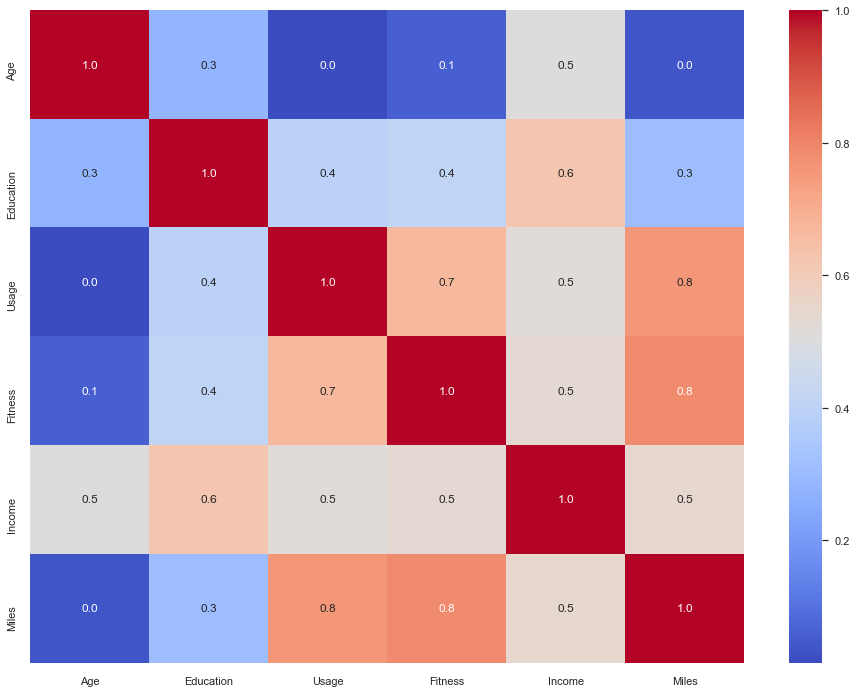

In [38]:
# Plot the heatmap of correlations
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Pair Plot


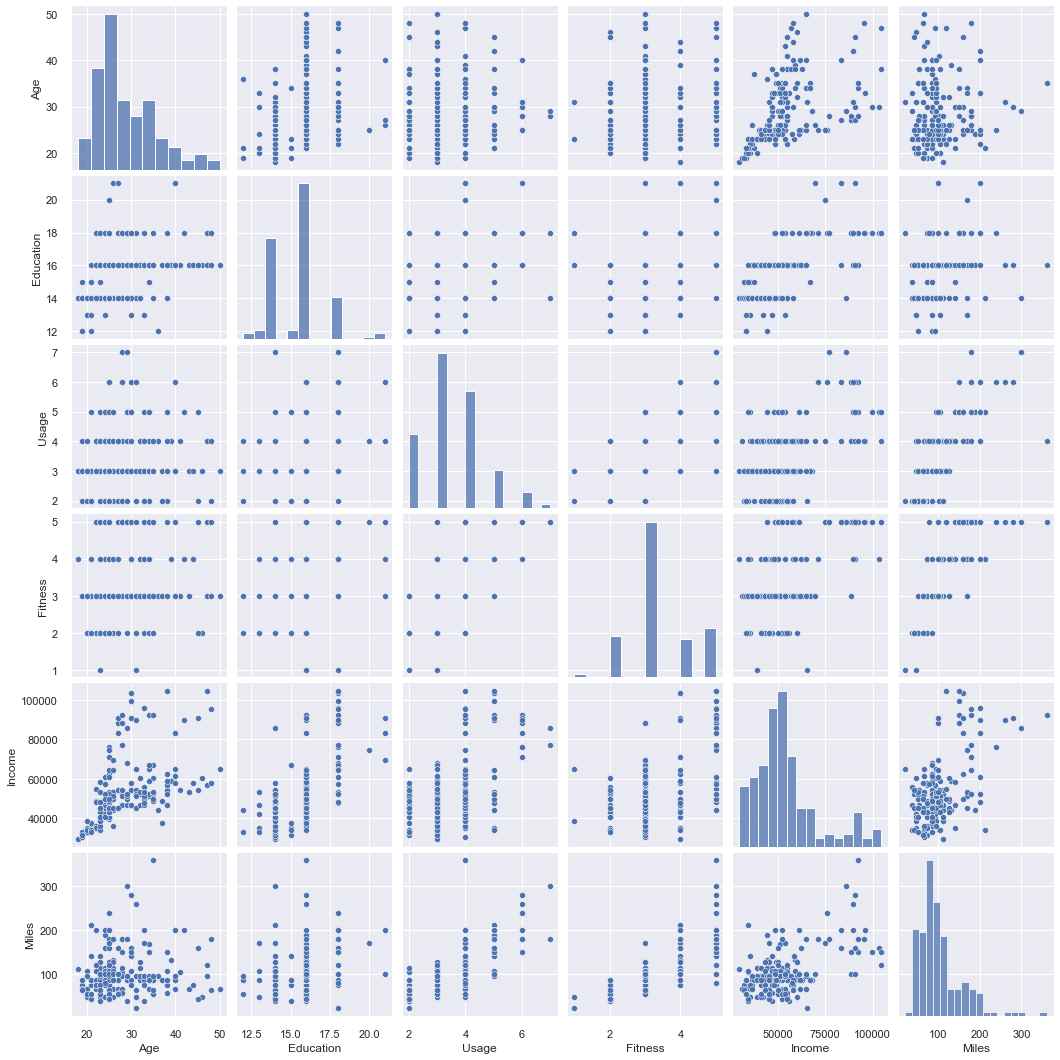

In [39]:
# Create a pair plot to show all relationships
print("Pair Plot")
sns.pairplot(data=df)
plt.show()

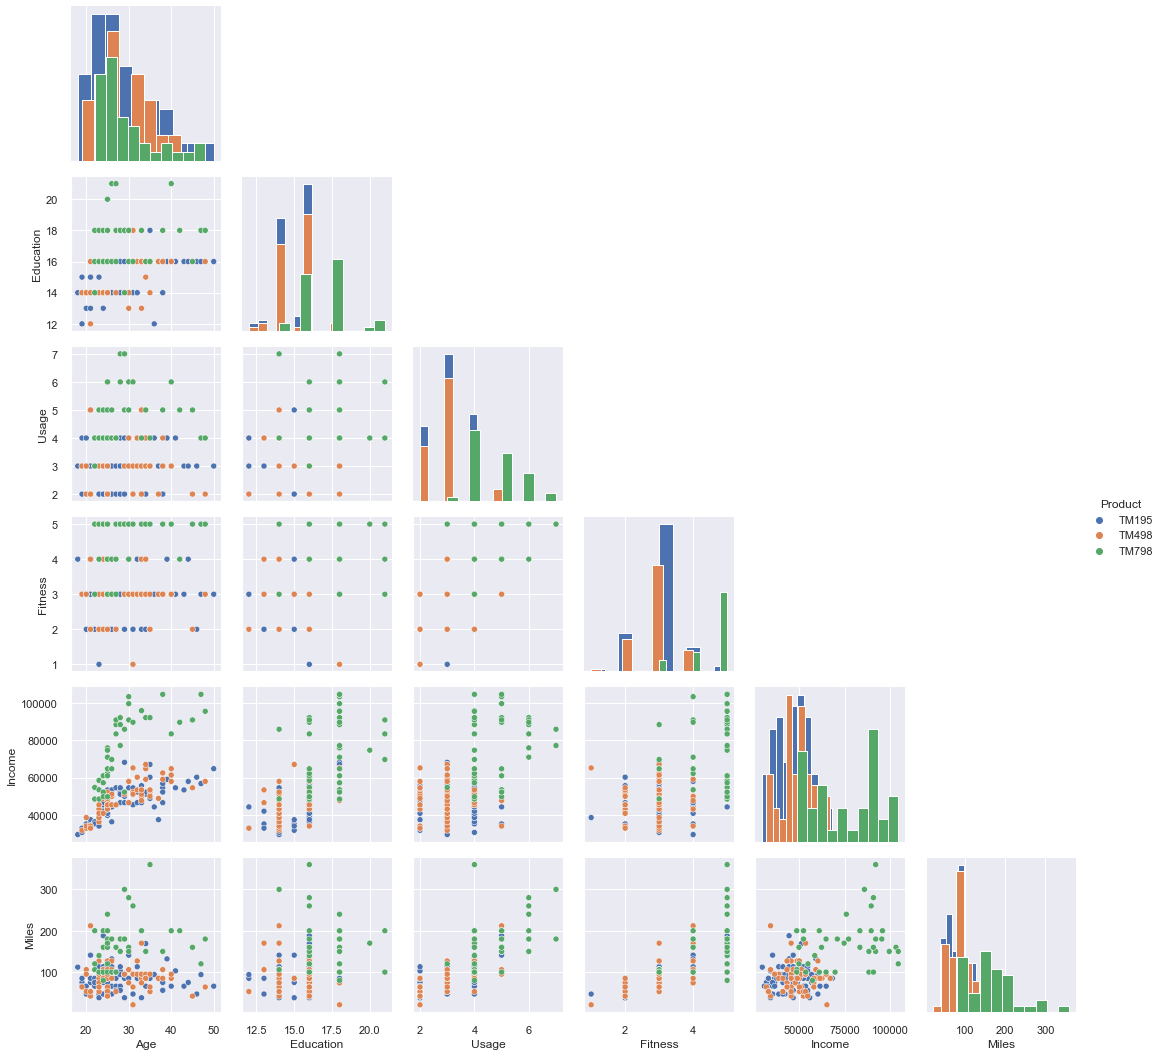

In [40]:
# Create a pair plot to show all numerical relationships per product
g = sns.PairGrid(df, hue="Product",diag_sharey=False, corner=True)
g.map_diag(plt.hist)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Text(0.5, 1.0, 'Relationship between self-rated fitness level and desired use')

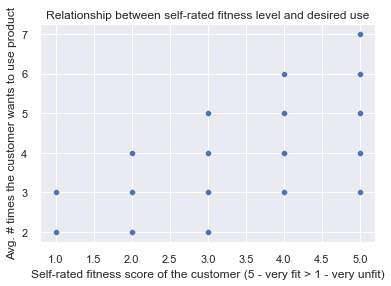

In [74]:
sns.scatterplot(x='Fitness',y='Usage',data=df)
plt.xlabel('Self-rated fitness score of the customer (5 - very fit > 1 - very unfit)')
plt.ylabel('Avg. # times the customer wants to use product')
plt.title('Relationship between self-rated fitness level and desired use')

'Relationship between Age and Product'

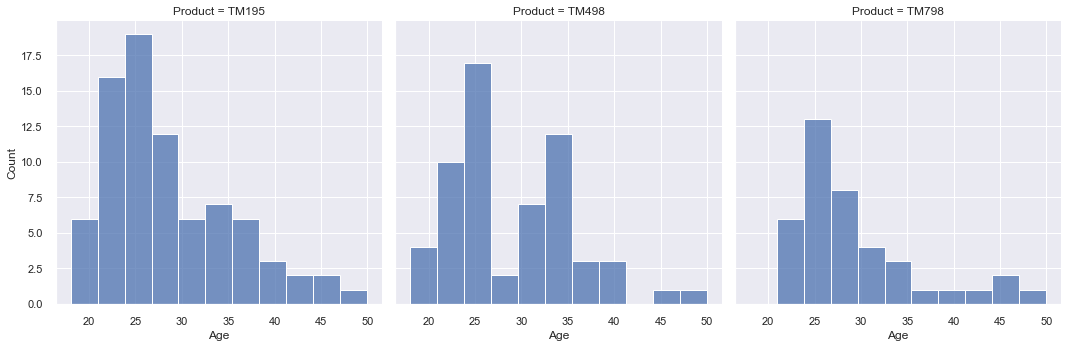

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

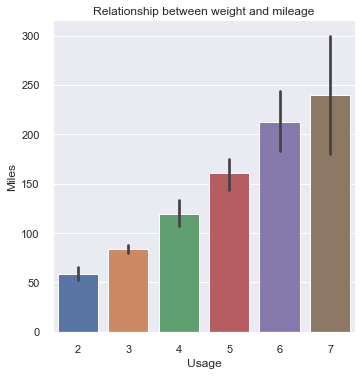

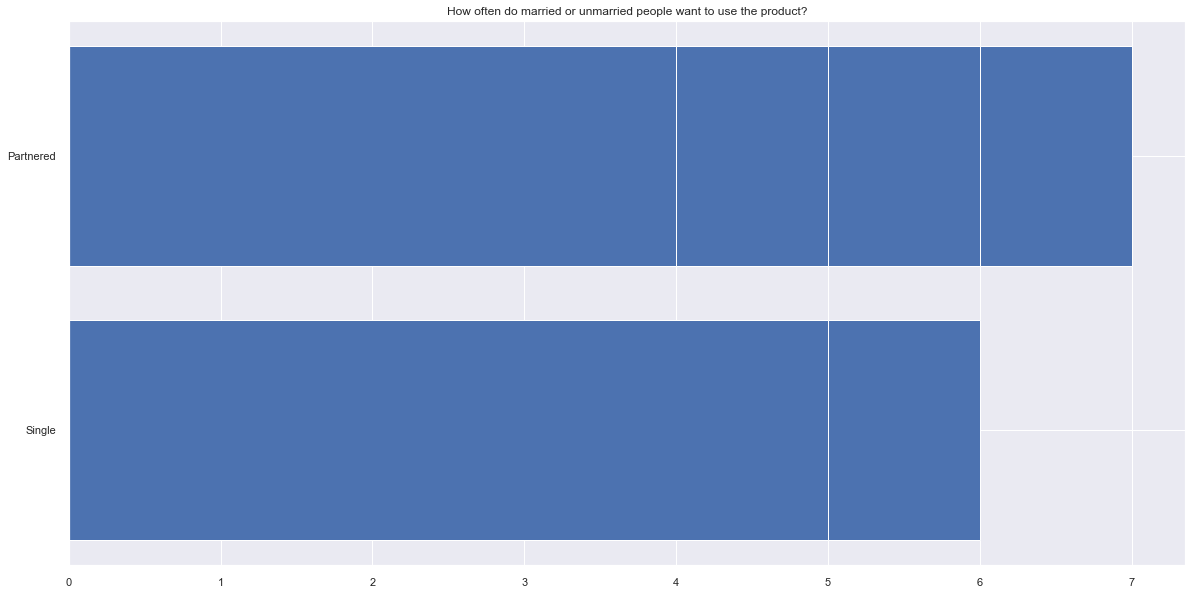

<Figure size 1440x720 with 0 Axes>

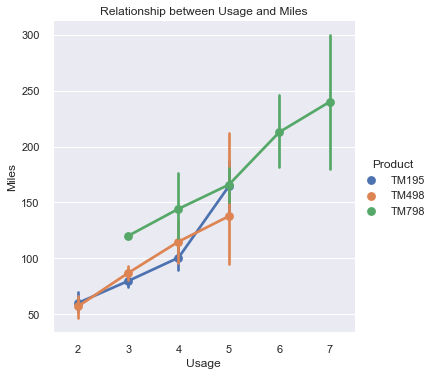

'What does sex at different levels of education tell us?'

<Figure size 1440x720 with 0 Axes>

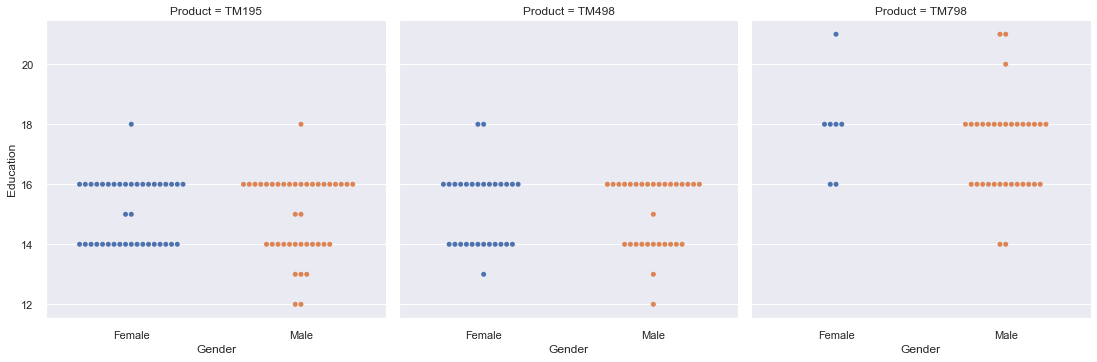

'What is the product differentiation per Income?'

<Figure size 1440x720 with 0 Axes>

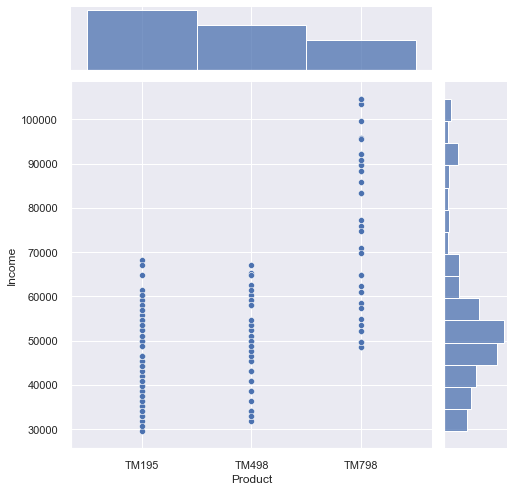

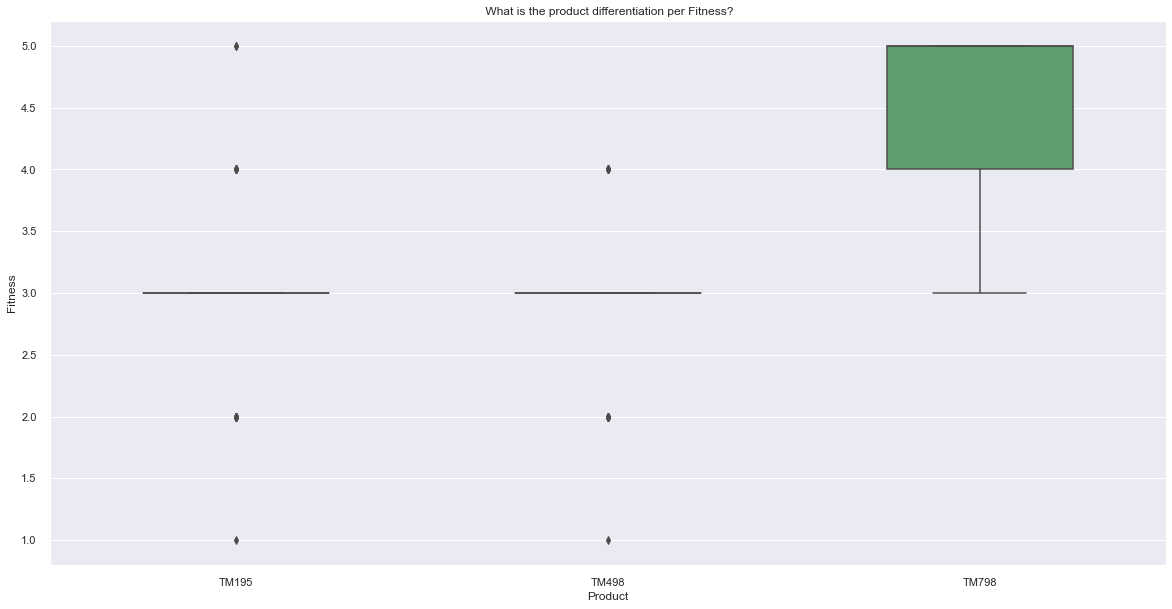

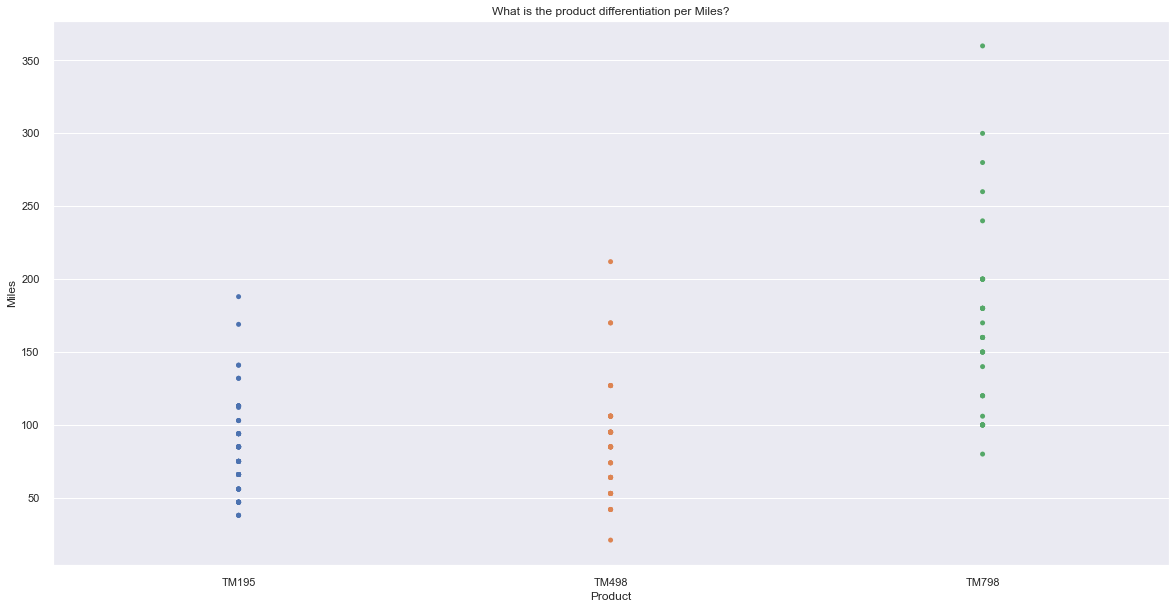

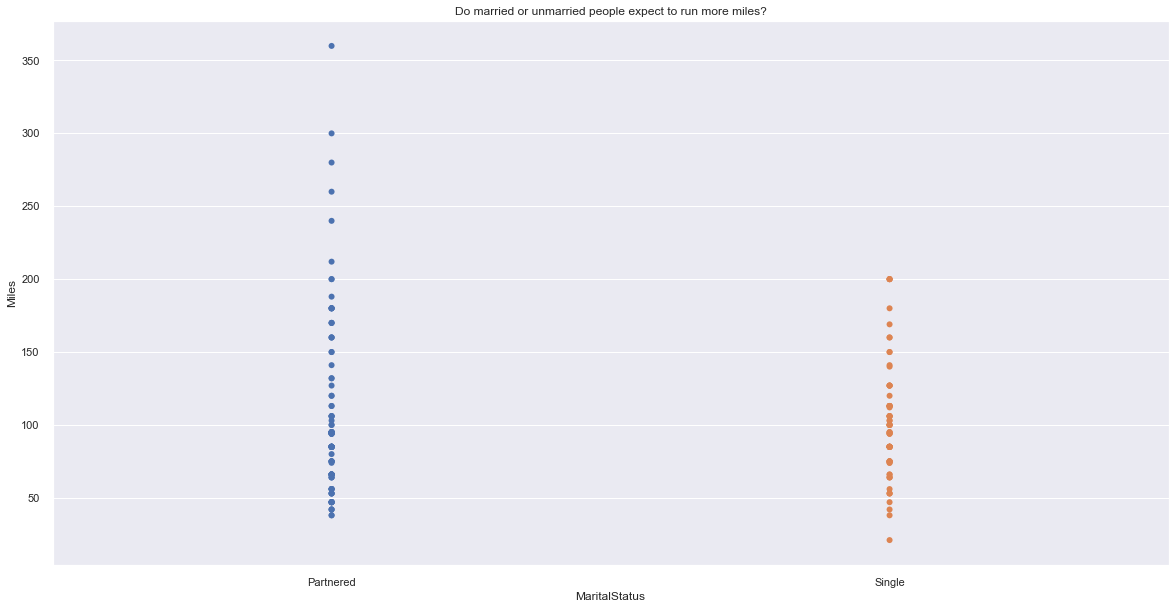

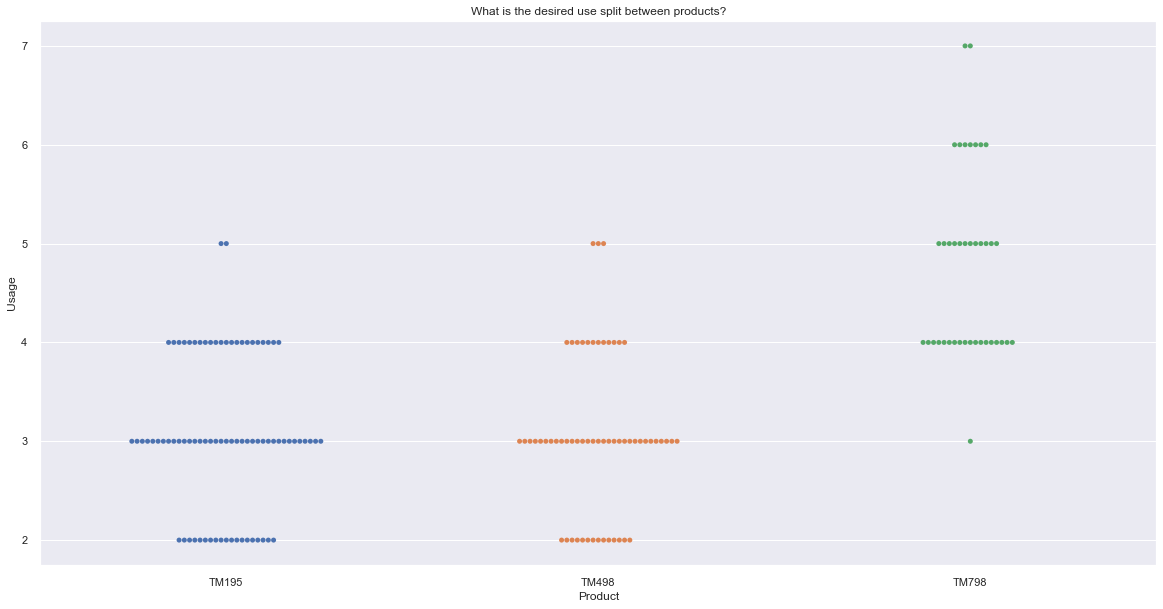

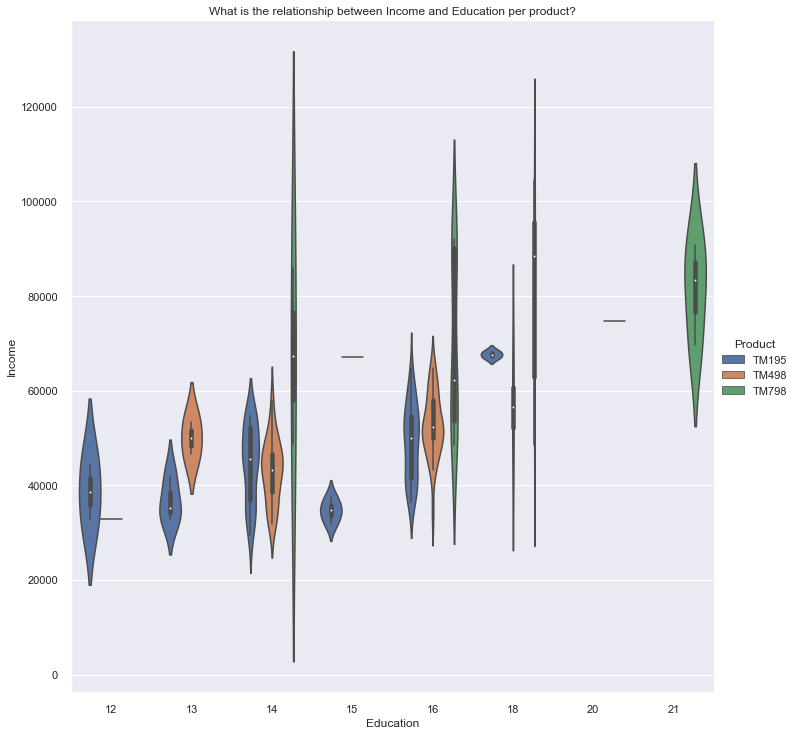

<Figure size 1440x720 with 0 Axes>

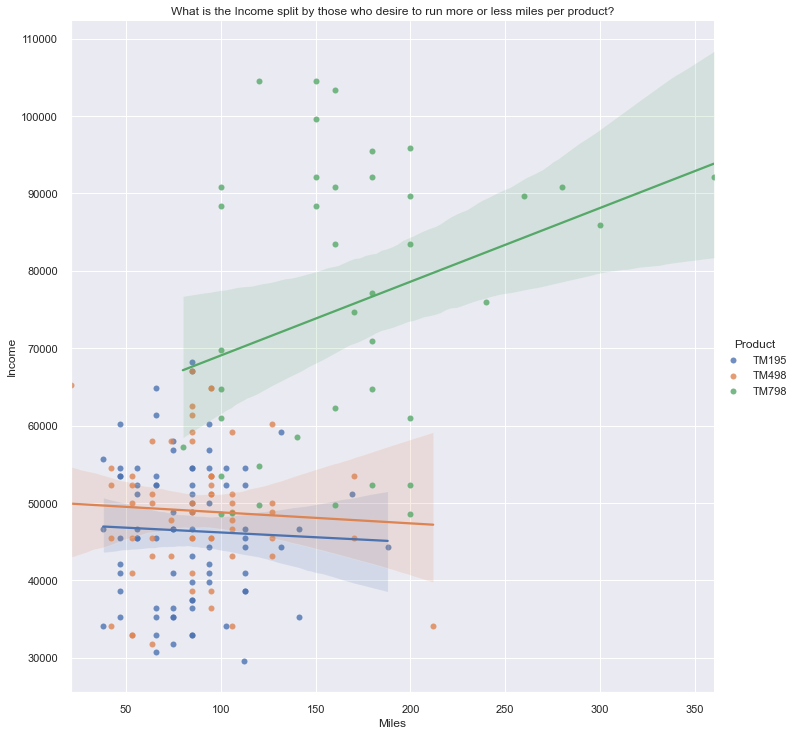

What is the Gender split between married and unmarried people when looking at Income vs Fitness?


<Figure size 1440x720 with 0 Axes>

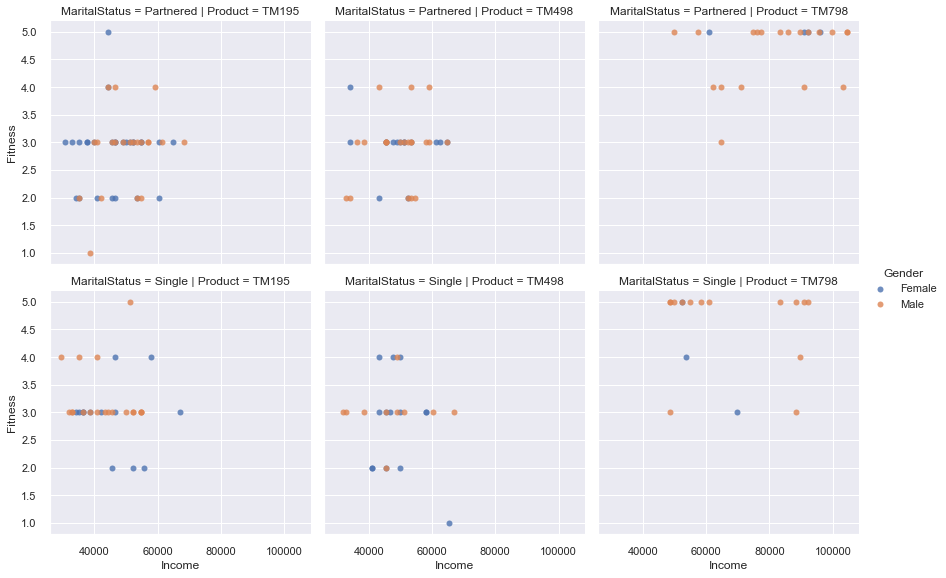

In [97]:
# Visualizations of relations between features based on correlation observations and/or product segmentation
# Scatter Plot
display("Relationship between Age and Product")
sns.displot(data=df, x="Age", col="Product")
plt.figure(figsize=(20,10))
plt.show()

#"Bar Plot"
plt.figure(figsize=(20,10))
sns.catplot(x=df["Usage"], y=df["Miles"], kind="bar", data=df) #0.8 correlation
plt.title("Relationship between weight and mileage")
plt.show()

#Bar Plot2
plt.figure(figsize=(20,10))
plt.barh(df["MaritalStatus"], df["Usage"]); #How often do married or unmarried people want to use the product?
plt.title("How often do married or unmarried people want to use the product?")
plt.show()

#Point Plot
plt.figure(figsize=(20,10))
sns.catplot(x="Usage", y=df["Miles"], hue="Product", kind="point", data=df) #0.8 correlation
plt.title("Relationship between Usage and Miles")
plt.show()

#Swarm Plot
plt.figure(figsize=(20,10))
display("What does sex at different levels of education tell us?")
sns.catplot(x='Gender', y='Education', data=df, col='Product', kind="swarm", height=5, col_wrap = 5) # What does sex at different levels of education tell us?
plt.show()

#Joint Plot
plt.figure(figsize=(20,10))
display("What is the product differentiation per Income?")
sns.jointplot(df["Product"], df["Income"], size=7) # What is the product differentiation per Income?
plt.show()

#Box Plot
plt.figure(figsize=(20,10))
sns.boxplot(x = df["Product"], y = df["Fitness"], width=.5) # What is the product differentiation per Fitness?
plt.title(" What is the product differentiation per Fitness?")
plt.show()

#Strip Plot
plt.figure(figsize=(20,10))
sns.stripplot(x = df["Product"], y = df["Miles"], data = df, jitter=False) # What is the product differentiation per Miles?
plt.title("What is the product differentiation per Miles?")
plt.show()

#Strip Plot 2
plt.figure(figsize=(20,10))
sns.stripplot(x = df["MaritalStatus"], y = df["Miles"], data = df, jitter=False, size=6) # Do married or unmarried people expect to run more miles?
plt.title("Do married or unmarried people expect to run more miles?")
plt.show()

#Swarm Plot
plt.figure(figsize=(20,10))
sns.swarmplot(x = df["Product"], y = df["Usage"], data = df, size=5) 
plt.title("What is the desired use split between products?")
plt.show()

#Violin Plot
sns.catplot(x="Education", y="Income", hue="Product", kind="violin", data=df, size=10)
plt.title("What is the relationship between Income and Education per product?")
plt.show()

#Basic Regression Plot
plt.figure(figsize=(20,10))
sns.lmplot(x="Miles", y="Income", hue = "Product", data=df, size=10)
plt.title("What is the Income split by those who desire to run more or less miles per product?")
plt.show()

#Basic Regression Plot 2
plt.figure(figsize=(20,10))
print("What is the Gender split between married and unmarried people when looking at Income vs Fitness?")
sns.lmplot(x="Income", y="Fitness", row="MaritalStatus", col="Product",
               data=df, height=2, hue="Gender", size=4, aspect=1, fit_reg=False) 

## Observations from the dataset

**Observations of Features**

`Product`
* There are 3 products in the dataset.
* TM190 is the most measured product in this dataset.
* TM789 only has 22% of the records in the data. Why is this?
* TM789 could have features which allow for greater usage, since expected Miles are higher.

`Age` - in no of years, of the customer
* The age range is 18 - 50 year olds.
* The most frequent customer age is 25.
* 75% of these treadmill products were sold to customers over the age of 24.

`Gender` - of the customer
* 57% of the data is made up of Male customers.
* Female's income caps at $50,000.
* Male’s general fitness range is 3 - 4 times per week.

`Education` - in no. of years, of the customer
* The average customer has less than 16 years.
* There are very few outliers.
* Education has a slightly strong correlation with Income.

`Marital Status` - of the customer
* Partnered is the greatest type of status amongst measured customers with 107 values.
* The fitness level distribution between both categories is equal.
* Partnered customers have more miles above the 200 value marker.

`Usage` - Avg. # times the customer wants to use the treadmill every week
* The TM798 is used more often than the other products.
* More than 50% of customers desire to use the treadmill more than 3x per week.
* There is a strong correlation (.7) between Usage and Fitness.
* Usage points to the needed durability of the treadmill.

`Fitness` - Self-rated fitness score of the customer (5 - very fit, 1 - very unfit)
* The average reported score is a 3.
* Customers who reported a 5 do not use the TM498.
* There are more customers that are at a fitness level of 3 or above than 3 or below.

`Income` - of the customer
* The lowest reported income is $29562.
* Higher income customers, those with an income higher than 58668 dollars, tend to purchase the TM798 over the other products.
* The most common income is 45480 dollars.    

`Miles`- expected to run (in weeks).
* Cardio Fitness' customers are expected to run a total of 18575 miles.
* As expected, Fitness and Miles have a linear relationship.
* Users of the TM798 expect to run more miles than users of other products.
* Who runs 360 miles a week on average? This survey seems flawed, so may need to exclude from analysis.
* Variable is in miles, so the data must be from a US store.

## Conclusion and Recommendations

**Conclusion**

To conclude about our exploratory analysis, we have the following customer profiles (typical or average characteristics of a customer) for the different products, here is a summary:

`TM195`: 26-33yr olds, partnered, Male, with 16 years of education, who earn  on average $46418/yr, expect to run an average of 83 miles, report a fitness score of 3, and want to use the treadmill 3x per week on average.
    
`TM498`: 26-33yr olds, partnered, Male, with 16 years of education, who earn on average $48973/yr, expect to run average of 87 miles, report a fitness score of 3, and want to use the treadmill 3x per week on average.
    
`TM798`: 27-30yr olds, partnered, Male, with 18 years of education, who earn on average $75441/yr, expect to run average of 167 miles, report a fitness score of 5, and want to use the treadmill 5x per week on average. 

Our main insights were:

    1. The TM798 is generally bought by higher wage earners, who expect to run more, further, and rate their fitness higher.
    
    2. The TM195 & TM498 customers have roughly the same demographic and fitness outlook, except for gender.
    
    3. Most of the numerical data has data leaking to the right with outliers in the higher ranges.

**Recommendations**

I recommend the following thoughts in order to help the company in targeting new customers:

    1. Target the younger, married, college-educated, in middle wage earners demographic with the TM195 & TM498 models.
    
    2. Create new marketing aimed at Females for the TM498 since they have roughly the same income and fitness mindset.
    
    3. Additional research is needed to understand why Single and Female customers are not purchasing treadmills.


**Further Analysis**

I recommend the following ideas to improve this analysis.

    1. Bring in additional data for more context (i.e., sales reports, geographical data, and timing data).
    
    2. Get an equivocal sampling of sales data of the same products where the frequencies are even to compare more fairly.
    
    3. Consider creating a fitness test for customers to take rather than using self-reporting and incorporate the data.